In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.model_selection import  StratifiedShuffleSplit,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
#page 418 ex 

mnist_path = 'mnist-original.mat'

mnist = loadmat(mnist_path)
X = mnist['data'].T
y = mnist['label'][0]
#display(X.shape , y.shape)

# v = X.copy()
# X[v>=128] = 0
# X[v<128] = 255


# Scale all X values
#scaler = StandardScaler()
#X_scaled  = scaler.fit_transform(X)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.05,train_size=0.05, random_state=0)
train_index, test_index = next(sss.split(X=X, y=y))   

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


print('X_train shape ', X_train.shape,'X_test shape' , X_test.shape)
print('Y_train shape ', y_train.shape,'Y_test shape' , y_test.shape)


X_train shape  (3500, 784) X_test shape (3500, 784)
Y_train shape  (3500,) Y_test shape (3500,)


In [4]:
k = 10
kmeans = KMeans(n_clusters=k,random_state=0)
y_pred = kmeans.fit_predict(X_train)
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

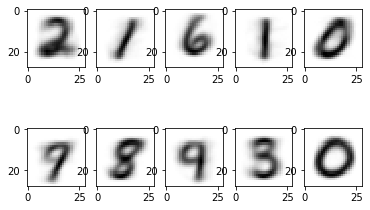

In [5]:
fig, axs = plt.subplots(2,5)
for ax, center in zip(axs.flatten(), kmeans.cluster_centers_):
    some_digit= center.reshape(28,28)
    ax.imshow(some_digit, cmap='binary')
plt.show()

In [8]:
confusion_matrix(y_train,y_pred)

array([[  1,   1,   5,   0, 136,   1,   0,   0,  16, 185],
       [  1, 184,   1, 206,   0,   0,   1,   0,   1,   0],
       [259,  19,   5,  29,   8,   5,   8,   5,  10,   1],
       [ 16,   5,   2,  26,  13,   3,  46,   7, 238,   1],
       [  2,  14,  10,  13,   3,  98,   5, 196,   0,   0],
       [  2,  24,   5,  23,  19,  25,  77,  27, 114,   0],
       [ 11,  11, 282,  10,  16,   0,   1,   3,   5,   5],
       [  3,  26,   1,  18,   0, 235,   3,  77,   1,   1],
       [  3,  20,   4,  19,   2,   9, 184,  10,  90,   0],
       [  0,   9,   0,  14,   0, 134,   5, 180,   6,   0]], dtype=int64)

In [23]:
clusters=np.array([])

for i in range(10):
    idx = np.where(y_train==i)
    unique, counts = np.unique(y_pred[idx], return_counts=True)
    print ('digit',i, 'cluster', unique[counts.argmax()])
    clusters = np.hstack((clusters,unique[counts.argmax()]))

print(clusters)
df = pd.DataFrame(y_pred)
df = df.replace(clusters,np.arange(10))
df
#df










digit 0 cluster 9
digit 1 cluster 3
digit 2 cluster 0
digit 3 cluster 8
digit 4 cluster 7
digit 5 cluster 8
digit 6 cluster 2
digit 7 cluster 5
digit 8 cluster 6
digit 9 cluster 7
[9. 3. 0. 8. 7. 8. 2. 5. 6. 7.]


,0
0,5
1,2
2,1
3,6
4,0
...,...
3495,9
3496,1
3497,7
3498,7


In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='manhattan',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))

In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='l2',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))

In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))